###Importo tutte le librerie necessarie

In [3]:
import geopy
from geopy import distance #TODO BUGGONE
import math
import itertools
import pandas
import numpy
from matplotlib import pyplot

###Calcolo il raggio medio che definisce Roma entro il raccordo anulare

NB: da verificare che distanza euclidea non crei troppi problemi

In [4]:
colosseo = (41.890173, 12.492331)
raccordo = [(41.914456, 12.615807),(41.990672, 12.502714),(41.793883, 12.511297),(41.812566, 12.396628),(41.956277, 12.384611)]
raggi = []

def geodesicDistance(A, B=colosseo):
    return geopy.distance.vincenty(A, B).meters

raggioTerra = 6372795
def euclidDistance1(A, B=colosseo):
    latitudine1 = math.radians(A[0])
    latitudine2 = math.radians(B[0])
    longitudine1 = math.radians(A[1])
    longitudine2 = math.radians(B[1])
    x1 = raggioTerra*math.sin(math.pi-latitudine1)*math.cos(longitudine1)
    y1 = raggioTerra*math.sin(math.pi-latitudine1)*math.sin(longitudine1)
    z1 = raggioTerra*math.cos(math.pi-latitudine1)
    x2 = raggioTerra*math.sin(math.pi-latitudine2)*math.cos(longitudine2)
    y2 = raggioTerra*math.sin(math.pi-latitudine2)*math.sin(longitudine2)
    z2 = raggioTerra*math.cos(math.pi-latitudine2)
    return math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)

def euclidDistance2(A, B=colosseo):
    latitudine1 = math.radians(A[0])
    latitudine2 = math.radians(B[0])
    longitudine1 = math.radians(A[1])
    longitudine2 = math.radians(B[1])
    return math.sqrt(raggioTerra*math.sin(latitudine1)*(longitudine1-longitudine2)**2+raggioTerra*(latitudine1-latitudine2)**2)

raggi = map(geodesicDistance, raccordo)
print raggi

raggi1= []
raggi1 = map(euclidDistance1, raccordo)
print raggi1

raggi2= []
raggi2 = map(euclidDistance2, raccordo)
print raggi2

raggiomedio = 0
for i in raggi:
	raggiomedio += i
raggiomedio /= len(raggi)
#raggiomedio = 11000
print raggiomedio
#print media

[10594.771772886095, 11195.797051005826, 10810.334056716569, 11724.513790860976, 11565.06035260429]
[9561.666348445664, 11204.74314532015, 10802.028143952435, 11178.132568907718, 10869.268356548899]
[4.573421793988439, 4.443745767765982, 4.297013270943725, 4.852411898005889, 4.8520761352156]
11178.0954048


###Popolo il dataframe e faccio una prima grossa scrematura

In [6]:
dataframe = pandas.read_csv("/home/protoss/Documenti/Siscomp_datas/cell_towers.csv")
#dataframe = pandas.read_csv("./romaprova.csv")
#dataframe
criterioMCC = dataframe.mcc == 222
criterioMinsamples = dataframe.samples > 1
italydoitcleaner = dataframe[criterioMCC & criterioMinsamples]
italydoitcleaner
#del italydoitcleaner['index']
italydoitcleaner = italydoitcleaner.reset_index()
#print italydoitcleaner

###Seleziono le antenne in Roma e faccio dei .csv appositi

In [10]:
#inroma = pandas.DataFrame([[41.947416, 12.371001],
#                            [41.899392, 12.397436],
#                            [41.870510, 12.287917],
#                            [41.899648, 12.515196]], 
#                            columns=('lon', 'lat'))

#istruzione che fa selezione alcune righe con criteri su alcune colonne, 
#ne seleziona alcune e restituisce un array nompy di valori desiderati
criterioTim = dataframe.net == 1
criterioWind = dataframe.net == 88
criterioVoda = dataframe.net == 10
criterio3 = dataframe.net == 99
coordinate = dataframe[criterioMCC & criterioMinsamples][['lat', 'lon']].values
coordinateTim = dataframe[criterioMCC & criterioMinsamples & criterioTim][['lat', 'lon']].values
coordinateWind = dataframe[criterioMCC & criterioMinsamples & criterioWind][['lat', 'lon']].values
coordinateVoda = dataframe[criterioMCC & criterioMinsamples & criterioVoda][['lat', 'lon']].values
coordinate3 = dataframe[criterioMCC & criterioMinsamples & criterio3][['lat', 'lon']].values
#print coordinate

distanza = []
distanza = map(geodesicDistance, coordinate)
distanzaTim = []
distanzaTim = map(geodesicDistance, coordinateTim)
distanzaWind = []
distanzaWind = map(geodesicDistance, coordinateWind)
distanzaVoda = []
distanzaVoda = map(geodesicDistance, coordinateVoda)
distanza3 = []
distanza3 = map(geodesicDistance, coordinate3)
#print len(distanza)

#da approfondire
#italydoitcleaner['distanze'] = italydoitcleaner[['lat', 'lon']].map(lambda x: geodesicDistance())

italydoitcleaner['distanze'] = distanza
criterioRaccordo = italydoitcleaner.distanze < raggiomedio
romacellid = italydoitcleaner[criterioRaccordo]
romacellid = romacellid.reset_index()
romacellid.to_csv("../data/roma_towers.csv")

#antenneTim = italydoitcleaner[criterioTim]
#antenneTim = antenneTim.reset_index()
#antenneTim['distanze'] = distanza
#romacellid = antenneTim[criterioRaccordo]
#romacellid = romacellid.reset_index()
#romacellid.to_csv("../data/tim_towers.csv")

#distanza = map(geodesicDistance, cell)
#def isInRome(point):
#    return geodesicDistance(point) <= raggiomedio
#filter(isInRome, cell)


Domande su iterazione su panda dataframe e efficienza, un tizio dice che la funzione iterrows è molto poco efficiente e sarebbe molto meglio usare un numpy array. Forse esistono funzioni più efficienti. 

http://stackoverflow.com/questions/10729210/iterating-row-by-row-through-a-pandas-dataframe  

http://stackoverflow.com/questions/7837722/what-is-the-most-efficient-way-to-loop-through-dataframes-with-pandas


In [118]:

#dataframe = pandas.read_csv("../Siscomp_datas/cell_towers.csv")
dataframe = pandas.read_csv("../data/roma_towers.csv")
#dataframe

#celle = dataframe[['cell', 'lat', 'lon', 'range']].values
#print celle
coordinate = dataframe[['lat', 'lon']].values
raggio = dataframe['range'].values

numdati = raggio.size
#numdati = 100

def matriceSupEuclid(datiCoordinate, datiRaggi):
    a = numpy.zeros((numdati,numdati), dtype=int)
    for i in xrange(numdati):
        for j in xrange(numdati-i-1):
#            if euclidDistance1(datiCoordinate[i], datiCoordinate[j+i+1]) <= datiRaggi[i] + datiRaggi[j+i+1]:
#                a[i,j+i+1] = 1
#                a[j+i+1,i] = 1
#            else:
#                a[i,j+i+1] = 0
            a[i,j+i+1] = a[j+i+1,i] = (euclidDistance1(datiCoordinate[i], datiCoordinate[j+i+1]) <= datiRaggi[i] + datiRaggi[j+i+1])
    return a

def matriceSupGeodetic(datiCoordinate, datiRaggi):
    a = numpy.zeros((numdati,numdati))
    for i in xrange(numdati):
        for j in xrange(numdati-i-1):
            if geodesicDistance(datiCoordinate[i], datiCoordinate[j+i+1]) <= datiRaggi[i] + datiRaggi[j+i+1]:
#            if geodesicDistance(datiCoordinate[i], datiCoordinate[j+i+1]) <= datiRaggi[i] + datiRaggi[j+i+1]:
                a[i,j+i+1] = 1
                a[j+i+1,i] = 1
    return a

def matricetutta(datiCoordinate, datiRaggi):
    a = numpy.zeros((numdati,numdati))
    for i in xrange(numdati):
        for j in xrange(numdati):
            if geodesicDistance(datiCoordinate[i], datiCoordinate[j]) <= datiRaggi[i] + datiRaggi[j]:
                a[i,j] = 1
            if (i == j):
                a[i,j] = 0
    return a

#%time adiacenzaGeo = matriceSupGeodetic(coordinate, raggio)

%time adiacenzaEuclid = matriceSupEuclid(coordinate, raggio)

#adiacenzaEuclid
numpy.savetxt('adiacenzaeuclidea.csv',adiacenzaEuclid, fmt='%d',delimiter=',',newline='\n')      
#numpy.savetxt?
#ridotto = dataframe[['cell', 'lat', 'lon', 'range']]        
#b = numpy.zeros((50,50))

#for i in ridotto.iterrows():
#    for j in ridotto.iterrows():
#        if linkVettori(i, j):
#            a[ridotto["index"],ridotto["index"]] = 1

CPU times: user 1min 29s, sys: 492 ms, total: 1min 29s
Wall time: 1min 29s


Il primo tentativo è stato di fare la matrice di adiacenza a forza bruta. Con un campione di soli 50 nodi ci metteva pochi microsecondi, quindi abbiamo provato a fare la matrice di adiacenza delle 7000 antenne entro il raccordo anulare, notando che la compilazione durava tanto, facendo le dovute proporzioni abbiamo preventivato 2,5 ore di tempo di calcolo. La prima cosa che abbiamo sistemato è stato ovviamente fare un ciclo che calcolasse soltanto la metà superiore della matrice, dimezzando il tempo di calcolo. 

La prima cosa che abbiamo pensato di fare è stato di diagonalizzare a blocchi la matrice, o fare un ciclo di bassissimo livello che mettesse 0 a tutti gli elementi relativi alle antenne con $\Delta$Latitudine e/o $\Delta$Longitudine maggiori del range massimo del campione di dati. Il problema avuto è che il range delle antenne è tendenzialmente grande, con alcune che arrivano a 10km (con raggioRoma 11km)(e anche tanti samples), quindi non c'era modo di ridurre i calcoli. 

L'unica altra idea che abbiamo avuto è stata di non fare il calcolo complicato con la distanza sul geoide con il metodo vincenty. Primo passo è stato usare il metodo con great circles, l'altro è stato di considerare la porzione di Roma presa come un cerchio piano, calcolando quindi la distanza euclidea tra coordinate geografiche e convertendola in metri. E ci mette MOLTO meno tempo $\sim$10 volte in meno. Con un 
preventivo quindi di 10 minuti di tempo di calcolo invece di 1 ora e mezza.

TODO vedere parallelaizazione


###Prova preliminare con 50 dati
con vincenti 
$\sim$45 ms

con great circols
$\sim$25 ms

con euclid
$\sim$5 ms

###Prova 50 dati

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 31.8 ms  
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.3 ms

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 33.6 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.2 ms

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 31.2 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.24 ms

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 31 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.29 ms

###Prova 100 dati

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 133 ms  
CPU times: user 12 ms, sys: 16 ms, total: 28 ms
Wall time: 21.5 ms

CPU times: user 124 ms, sys: 0 ns, total: 124 ms
Wall time: 126 ms  
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 16.6 ms

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 126 ms  
CPU times: user 16 ms, sys: 8 ms, total: 24 ms
Wall time: 21.9 ms

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 127 ms  
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 16.8 ms

###con 500

CPU times: user 3.28 s, sys: 0 ns, total: 3.28 s
Wall time: 3.27 s  
CPU times: user 404 ms, sys: 0 ns, total: 404 ms
Wall time: 403 ms

CPU times: user 3.26 s, sys: 20 ms, total: 3.28 s
Wall time: 3.23 s
CPU times: user 404 ms, sys: 0 ns, total: 404 ms
Wall time: 401 ms

###con 1000
CPU times: user 12.6 s, sys: 32 ms, total: 12.6 s
Wall time: 12.5 s
CPU times: user 1.62 s, sys: 16 ms, total: 1.64 s
Wall time: 1.62 s

CPU times: user 12.5 s, sys: 48 ms, total: 12.5 s
Wall time: 12.5 s
CPU times: user 1.62 s, sys: 16 ms, total: 1.64 s
Wall time: 1.62 s

###con 2000
CPU times: user 49.7 s, sys: 160 ms, total: 49.9 s
Wall time: 49.6 s  
CPU times: user 6.47 s, sys: 40 ms, total: 6.51 s
Wall time: 6.44 s

CPU times: user 51.2 s, sys: 232 ms, total: 51.4 s
Wall time: 51.1 s  
CPU times: user 6.67 s, sys: 24 ms, total: 6.7 s
Wall time: 6.65 s




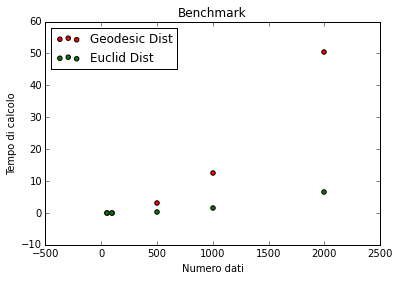

In [94]:
numdati = [50, 100, 500, 1000, 2000]
tempieuclid = [0.0042575, 0.0192, 0.402, 1.62, 6.545]
tempigeo = [0.032, 0.128, 3.25, 12.5, 50.35]

%matplotlib inline


geo = pyplot.scatter(x=numdati, y=tempigeo, label="Geodesic Dist", c='red')
euclid = pyplot.scatter(x=numdati, y=tempieuclid, label="Euclid Dist", c='green')
pyplot.title('Benchmark')
pyplot.xlabel("Numero dati")
pyplot.ylabel("Tempo di calcolo")
pyplot.legend(loc = 2)
#roma.plot(kind="scatter", x="lon", y="lat", label="Roma PRELIMINARE")

###Geo dist
Tempo previsto di calcolo con $\sim$ 7000 dati: $\sim$ 620 sec $\sim$ 10 minuti

###Euclid dist
Tempo previsto di calcolo con $\sim$ 7000 dati: $\sim$ 80 sec $\sim$ 1,3 minuti

In [2]:
adiacenzaEuclidea = numpy.genfromtxt("/home/protoss/Documenti/Siscomp_datas/AdiacenzaEuclidea.csv",delimiter=',',dtype='int')

In [4]:
import networkx
grafoRoma = networkx.Graph(adiacenzaEuclidea)

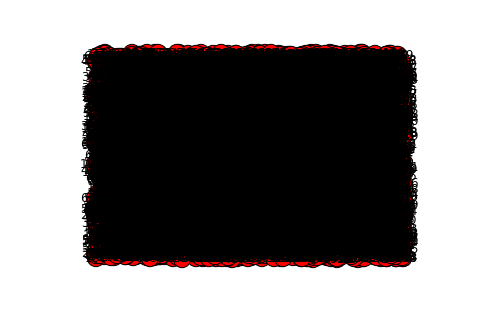

In [7]:
%matplotlib inline
networkx.draw_random(grafoRoma)

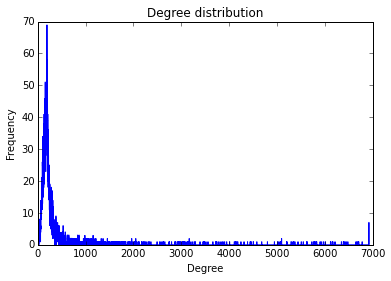

In [8]:
grado = grafoRoma.degree().values()

def degreeDistribution(gradi):
    pyplot.hist(gradi, bins=max(gradi)-min(gradi), histtype='step')
    pyplot.title('Degree distribution')
    pyplot.xlabel("Degree")
    pyplot.ylabel("Frequency")
    # return
    # histtype='bar', alpha=0.5
    # bins=max(grado)-min(grado)

distribuzione = degreeDistribution(grado)

In [13]:
0 in grado

False

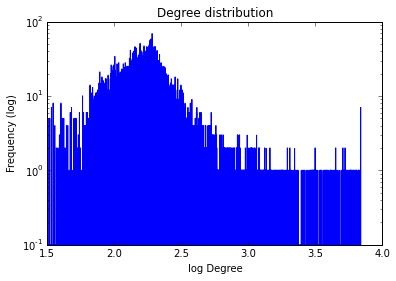

In [16]:
def degreeDistribution(gradi):
    pyplot.hist(numpy.log10(gradi), bins=max(gradi)-min(gradi), histtype='step', log=True)
    pyplot.title('Degree distribution')
    pyplot.xlabel("log Degree")
    pyplot.ylabel("Frequency (log)")
    # return
    # histtype='bar', alpha=0.5
    # bins=max(grado)-min(grado)

distribuzione = degreeDistribution(grado)

##TODO:  
* Prendere array coordinate                                                           ✔
* fare array distanze                                                                  ✔
* mettere colonna distanze in dataframe  ✔
* selezionare righe con variabile compresa entro raggiomedio                           ✔  
* fare un nuovo dataframe  ✔
* escludere tutti i nodi con 1 sample solo ✔
* fare P(k) ✔

##TODO:
* log binning 
* FARE GRAFICI MEGLIO 
* Soglia percolativa: fare grafico dimensioni giant cluster in funzione di rimozione di nodi
* in modo casuale
* cominciando da i nodi più connessi  
NB giant cluster è cluster che scala con N. E.g., se il giant cluster è composto da N/10 della rete, se raddoppio la rete o la dimezzo deve rimanere composto da 1/10 del totale dei nodi della rete. Idem se è N/100 o N/0.9

  Leggere (materiale lezione su percolazione-attacchi-epidemie):  
  http://www.nature.com/nature/journal/v406/n6794/full/406378a0.html  
  http://arxiv.org/pdf/cond-mat/0010317.pdf  
  http://arxiv.org/pdf/cond-mat/0007048.pdf  
  http://arxiv.org/pdf/cond-mat/0010251.pdf  
  
  Altro materiale forse utile:
  http://arxiv.org/pdf/cond-mat/9910332.pdf  
  http://arxiv.org/pdf/cond-mat/9907068.pdf  
  http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.71.8276&rep=rep1&type=pdf  
  
  
  Tesina: parte iniziale su problema robustezza reti, poi test su reti di antenne in roma (rete scale free ma che deve avere una certa robustezza)
  veder compagnie separae